### Visulising initial state fidelity distance on the Bloch sphere

In [64]:
from boson_data_lib import *
from qutip import *
import numpy as np
import scipy.linalg as sl

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns

In [65]:
def get_init_states():
    
    init_rho = []
    fidelity_distances = []
    
    best_init_rho =  np.array([[ 0.96693975+0.j        , -0.17832301+0.00560344j],
                               [-0.17832301-0.00560344j,  0.03306025+0.j        ]])
    
    for i in range(0,20):
        gamma = '2.5133'
        directory = "DATA/"
        
        file = directory + "State_D" + str(i+1) + '_CUT_data.h5'
        rho, dt = extract_rho(file, gamma)
        
        init_rho.append(rho[1])
        
        fidelity_distances.append(abs(np.trace(sl.sqrtm(sl.sqrtm(init_rho[i]) @ best_init_rho @ sl.sqrtm(init_rho[i])))))
        
    return init_rho, fidelity_distances

In [66]:
init_rhos, fid_distances  = get_init_states()

In [67]:
df = pd.read_pickle("fidelity_tests_D20.pkl")

In [68]:
df = df[df['Method'] == "simp"]
df = df[df['Training'] == "2.0"]
df.replace(to_replace= 'simp', value = 'Lindblad', inplace=True )

df['Distance'] = df['Distance'].astype(float)
df['Time'] = df['Time'].astype(float)

In [69]:
pole = [0,90]
ecuator = [0,0]

In [70]:
def bloch_vector(rho):
    rho = np.matrix(rho)
    # Pauli matrices
    sigmas = [ [[0, 1], [1, 0]], [[0, -1j], [ 1j, 0]], [[1, 0],[0, -1]]] 
    # Bloch vector of the 2 x 2 density matrix
    bloch_vector = np.array([ np.real(np.trace(np.array(sigma) @ rho)) for sigma in sigmas])
    return bloch_vector

def bloch_init_states(rho, fid_distances, view = [-60,30], palette = 'plasma'):
   
    val = np.array(fid_distances) 
    val -= val.min()
    val /= val.max()
    
    colors = plt.cm.get_cmap(palette)(val)[:,:3]

    b = qutip.Bloch()
    b.view = view
    b.point_marker = ['.']
    b.point_size = [300]
    
    b.point_color = colors
    
    for i in range(20):
        xp, yp, zp = bloch_vector(rho[i]).tolist()
        b.add_points([xp, yp, zp])
    
    b.render()
    
    return b

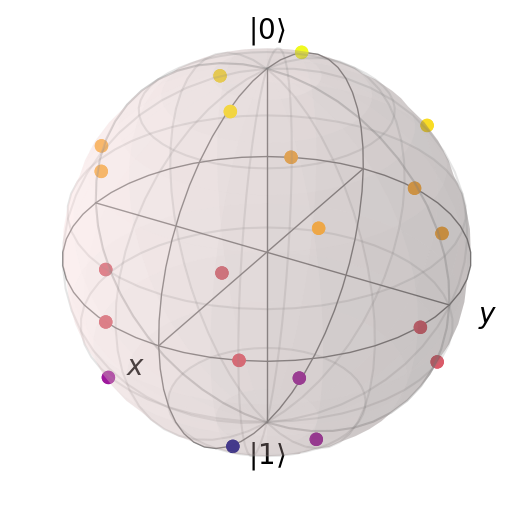

In [71]:
f1  = bloch_init_states(init_rhos, fid_distances)
f1.show()
bb1 = f1.fig
bb1.savefig('bloch3d.svg')

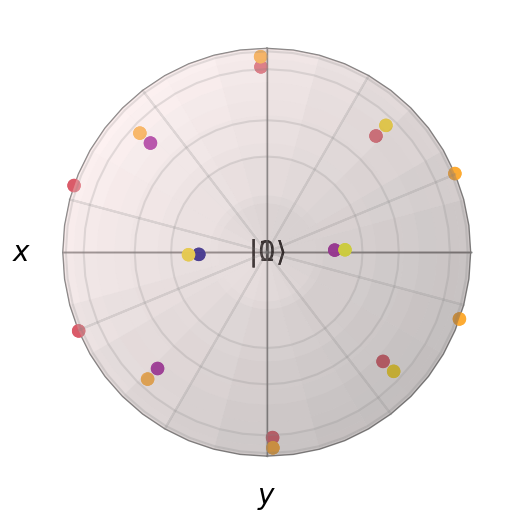

In [72]:
f2  = bloch_init_states(init_rhos, fid_distances, view = pole)
f2.show()
bb2 = f2.fig
bb2.savefig('bloch_pole.svg')

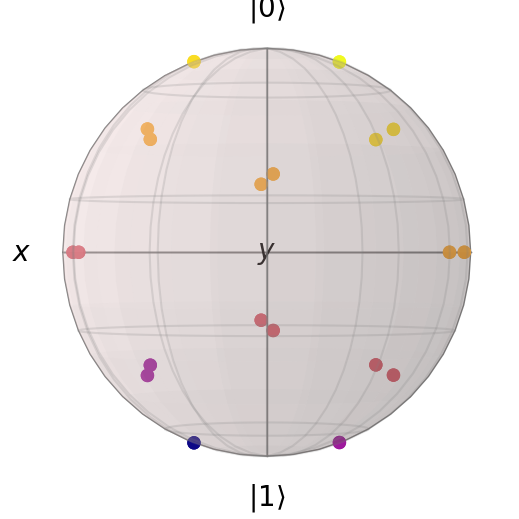

In [73]:
f3  = bloch_init_states(init_rhos, fid_distances, view = ecuator)
f3.show()
bb3 = f3.fig
bb3.savefig('bloch_ecuatorY.svg')

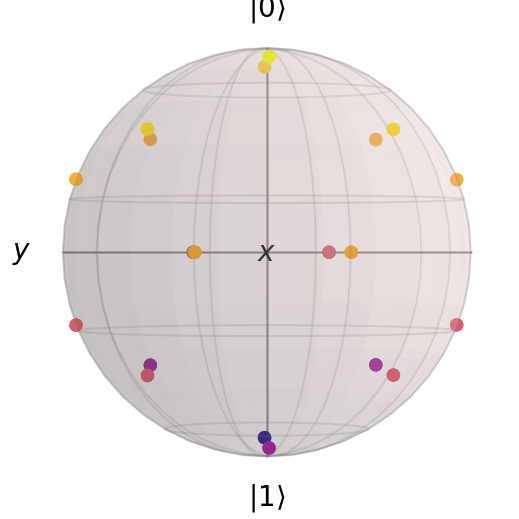

In [74]:
xecuator = [90,0]
f4  = bloch_init_states(init_rhos, fid_distances, view = xecuator)
f4.show()
bb4 = f4.fig
bb4.savefig('bloch_ecuatorX.svg')

In [57]:
def bloch_in_grid(rho, fid_distances, df, palette):

    gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
    
    fig, ax = plt.subplots(8, 1, figsize=(5,20)) #sharex=True, sharey=True,
    
    for i in range(8):

        sns.lineplot(
        ax=ax[i],
        data=df[(df['Gamma']==gammas[i])],
        x="Time", y="Infidelity",
        hue="Distance",
        palette=palette,
        legend=False
        )
        #ax[i].set(yscale="log")
    
    return fig

In [55]:
df = pd.read_pickle("fidelity_tests_D20.pkl")

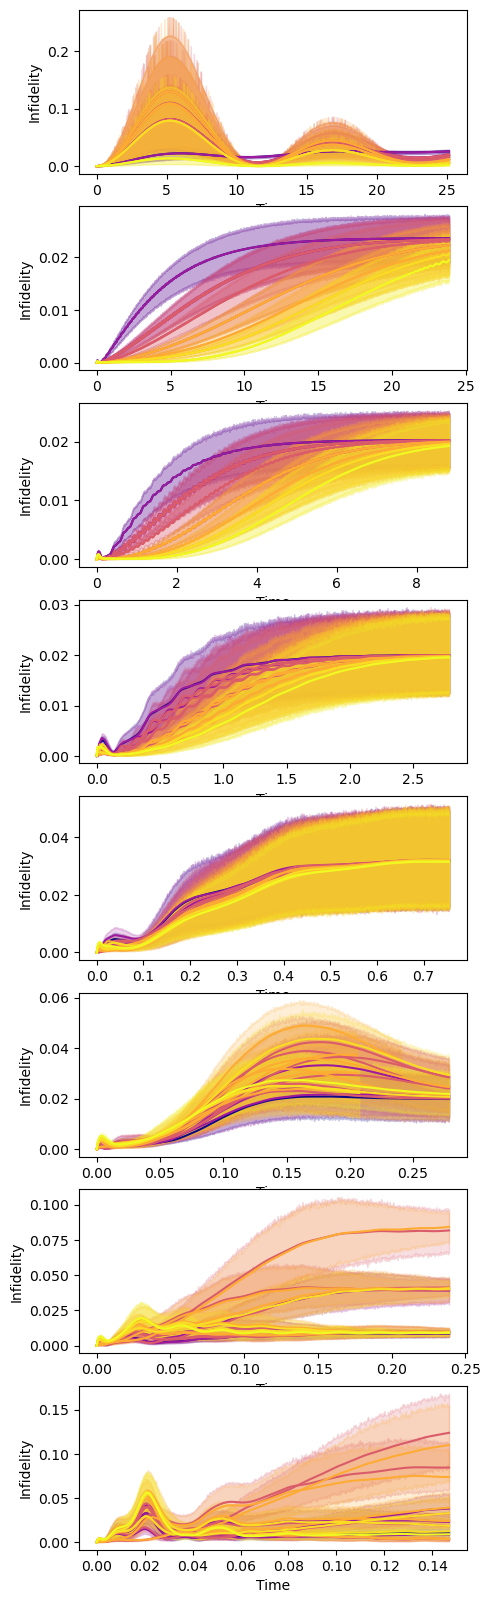

In [58]:
fig = bloch_in_grid(init_rhos, fid_distances, df, palette="plasma")

In [59]:
fig.show()

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_7864\89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [63]:
fig.savefig("infidelity_evolution.svg")


In [25]:
colours = plt.cm.plasma(np.linspace(0, 1, 6))[:, :3]

In [26]:
colours

array([[5.03830e-02, 2.98030e-02, 5.27975e-01],
       [4.17642e-01, 5.64000e-04, 6.58390e-01],
       [6.92840e-01, 1.65141e-01, 5.64522e-01],
       [8.81443e-01, 3.92529e-01, 3.83229e-01],
       [9.88260e-01, 6.52325e-01, 2.11364e-01],
       [9.40015e-01, 9.75158e-01, 1.31326e-01]])

In [27]:
mpl.colors.rgb_to_hsv(colours)

array([[0.67355184, 0.94355225, 0.527975  ],
       [0.77233747, 0.99914336, 0.65839   ],
       [0.87386086, 0.76164627, 0.69284   ],
       [0.00311111, 0.56522543, 0.881443  ],
       [0.09459889, 0.78612511, 0.98826   ],
       [0.17360782, 0.86532849, 0.975158  ]])